In [1]:
import rlssm
import pandas as pd
import os

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data['S_cor'] = data['f_cor'].values
data['S_inc'] = data['f_inc'].values

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc
0,10,1,1,61,52,4,3,1,1.285418,0,61,52
1,10,1,2,54,37,4,2,1,1.577622,0,54,37
2,10,1,3,51,51,4,3,2,1.564731,0,51,51
3,10,1,4,50,35,3,1,2,1.217245,1,50,35
4,10,1,5,59,50,4,2,3,1.929781,0,59,50


In [3]:
model = rlssm.ALBAModel_2A(1)

Using cached StanModel


In [4]:
# sampling parameters
n_iter = 350
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
k_priors {'mu': 1, 'sd': 1}
A_priors {'mu': 0.3, 'sd': 1}
tau_priors {'mu': 0, 'sd': 1}
v0_priors {'mu': 9, 'sd': 2}
ws_priors {'mu': 0, 'sd': 2}
wd_priors {'mu': 3, 'sd': 3}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
model_fit.rhat.describe()

,rhat
count,1447.000000
mean,1.213214
std,0.212152
min,0.990000
25%,1.000000
50%,1.100000
75%,1.500000
max,1.500000


In [7]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.1,lp__
k,1.5,k
A,1.0,A
tau,1.4,tau
v0,1.0,v0


In [8]:
model_fit.waic

{'lppd': -240.5070786255622,
 'p_waic': 501.2852457621889,
 'waic': 1483.584648775502,
 'waic_se': 195.90138216429236}

### Posteriors

In [9]:
model_fit.samples

,transf_k,transf_A,transf_tau,transf_v0,transf_ws,transf_wd
0,1.15006,3.03980,0.593801,2.26302,0.001997,0.033571
1,1.54341,2.58061,0.530574,1.97378,0.004247,0.042406
2,2.50786,3.15758,0.342410,2.64953,0.003823,0.047486
3,2.35125,1.96523,0.305568,1.14084,0.013756,0.035068
4,1.90160,2.34405,0.399683,1.91413,0.004288,0.040641
...,...,...,...,...,...,...
135,2.87385,2.74146,0.264518,2.05826,0.010877,0.043286
136,2.40825,2.66260,0.264953,2.06468,0.005130,0.036488
137,2.82391,3.81197,0.263938,2.80717,0.005022,0.041802
138,2.73228,2.94346,0.270068,2.41149,0.005241,0.036936


In [10]:
model_fit.trial_samples

{'k_t': array([[1.15006, 1.15006, 1.15006, ..., 1.15006, 1.15006, 1.15006],
        [1.54341, 1.54341, 1.54341, ..., 1.54341, 1.54341, 1.54341],
        [2.50786, 2.50786, 2.50786, ..., 2.50786, 2.50786, 2.50786],
        ...,
        [2.82391, 2.82391, 2.82391, ..., 2.82391, 2.82391, 2.82391],
        [2.73228, 2.73228, 2.73228, ..., 2.73228, 2.73228, 2.73228],
        [2.87275, 2.87275, 2.87275, ..., 2.87275, 2.87275, 2.87275]]),
 'A_t': array([[3.0398 , 3.0398 , 3.0398 , ..., 3.0398 , 3.0398 , 3.0398 ],
        [2.58061, 2.58061, 2.58061, ..., 2.58061, 2.58061, 2.58061],
        [3.15758, 3.15758, 3.15758, ..., 3.15758, 3.15758, 3.15758],
        ...,
        [3.81197, 3.81197, 3.81197, ..., 3.81197, 3.81197, 3.81197],
        [2.94346, 2.94346, 2.94346, ..., 2.94346, 2.94346, 2.94346],
        [3.27814, 3.27814, 3.27814, ..., 3.27814, 3.27814, 3.27814]]),
 'tau_t': array([[0.593801, 0.593801, 0.593801, ..., 0.593801, 0.593801, 0.593801],
        [0.530574, 0.530574, 0.530574, ..., 

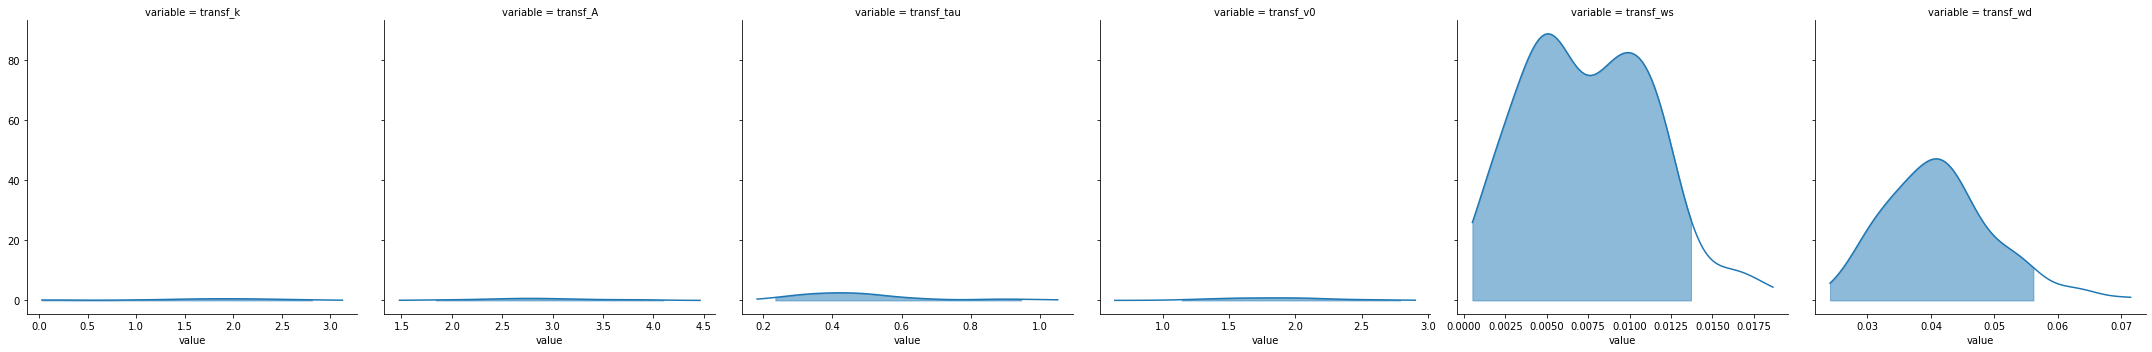

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

/var/folders/56/qbnffzv10bg6kcp5fhsvg2dh0000gn/T/ipykernel_7468/3557547225.py:1: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)


In [13]:
pp_rt

array([[1.34231209, 2.03393045, 1.17881661, ..., 1.79209429, 3.24368519,
        1.39161396],
       [1.04310877, 1.16613135, 1.29913874, ..., 1.12523728, 1.60149026,
        1.90241819],
       [1.31180721, 1.24507748, 2.40077262, ..., 1.82292752, 1.61287947,
        1.1389646 ],
       ...,
       [1.12668453, 1.16673415, 2.01486978, ..., 1.1108999 , 1.37459805,
        1.79644072],
       [1.44477752, 1.29609167, 1.88327499, ..., 1.11483388, 1.46047229,
        1.77582101],
       [1.29225438, 1.67635004, 2.26174013, ..., 1.52150043, 2.19905965,
        3.41978635]])

In [14]:
pp_acc

array([[1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 1., 0.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.661088,1.433398,1.461758,1.079540,1.237146,1.398694,1.557390,1.877973,1.000472,1.173193,1.351741,1.543814,1.892763
2,0.665272,1.503086,1.141116,1.080178,1.268511,1.498819,1.639425,2.001095,1.053347,1.241295,1.438109,1.613833,2.020651
3,0.673640,1.456258,1.292336,1.028349,1.169882,1.404693,1.523191,1.862146,1.002157,1.189838,1.414742,1.619391,1.963620
4,0.648536,1.495859,2.274315,1.087464,1.271874,1.448808,1.636695,1.929274,1.017355,1.208713,1.396298,1.616489,1.953195
5,0.677824,1.496910,2.841313,1.076480,1.261544,1.441510,1.587997,1.953195,1.044229,1.207298,1.375928,1.606861,1.937417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.627615,1.443753,1.316608,1.070922,1.230308,1.350015,1.507102,1.937141,1.007191,1.206379,1.394878,1.578947,1.887742
67,0.631799,1.558962,3.433025,1.092582,1.330827,1.519601,1.799531,2.189508,1.060846,1.250337,1.410123,1.631777,2.051991
68,0.669456,1.490929,1.045781,1.103600,1.262747,1.421968,1.591848,2.108502,1.032438,1.215263,1.432810,1.669736,1.944941


/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


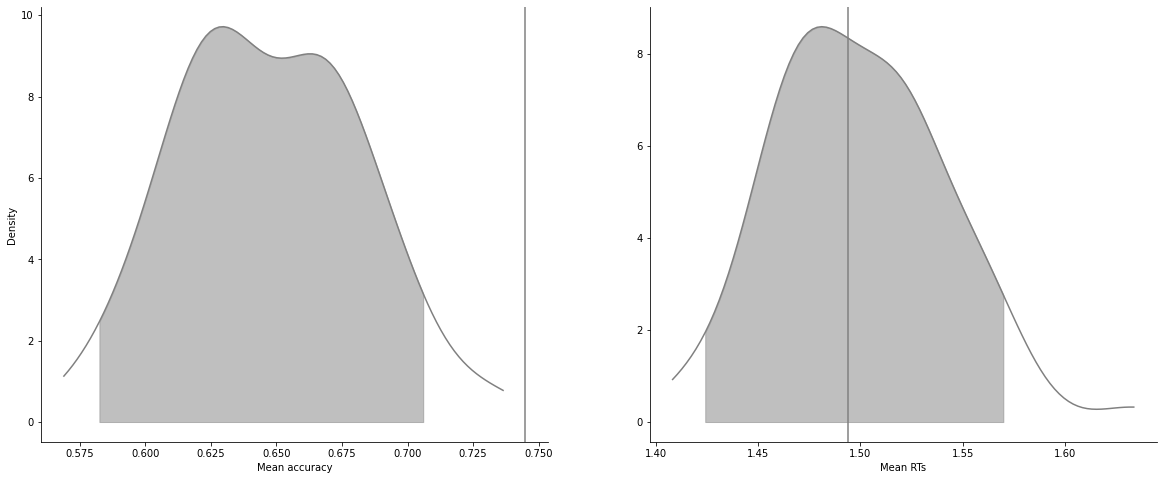

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


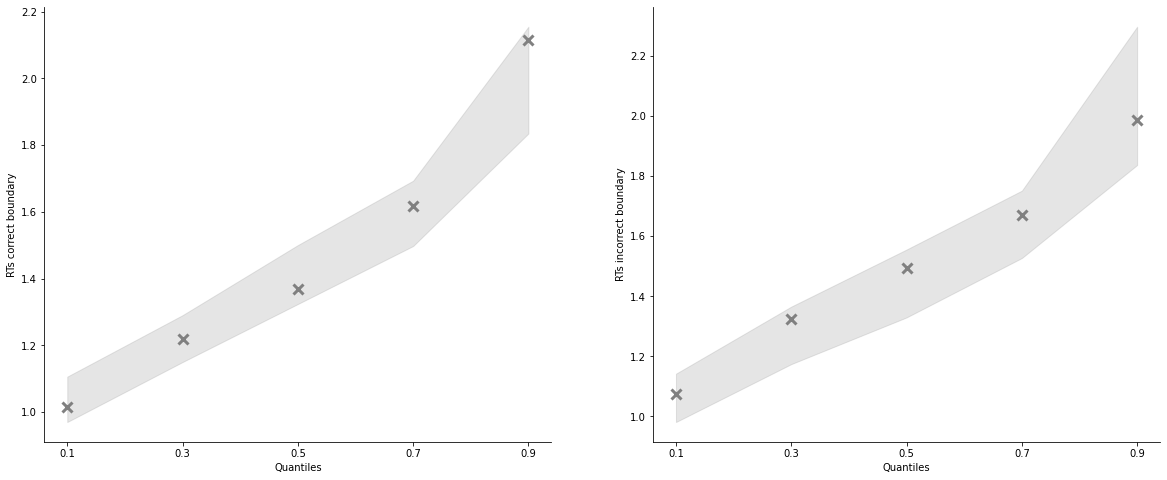

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc,accuracy_rescale,choice_pair,block_bins
0,0,10,1,1,61,52,4,3,1,1.285418,0,61,52,2,CD,1
1,1,10,1,2,54,37,4,2,1,1.577622,0,54,37,2,BD,1
2,2,10,1,3,51,51,4,3,2,1.564731,0,51,51,2,CD,1
3,3,10,1,4,50,35,3,1,2,1.217245,1,50,35,1,AC,1
4,4,10,1,5,59,50,4,2,3,1.929781,0,59,50,2,BD,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.40  1.497991  1.682657   
                        2                0.80  1.478187  1.719814   
                        3                0.60  1.512186  0.860360   
                        4                0.55  1.458934  0.602295   
                        5                0.55  1.583398  0.280005   
...                                       ...       ...       ...   
3           CD          66               0.55  1.452657  1.767472   
                        67               0.40  1.509204  0.476225   
                        68               0.40  1.579940  1.478272   
                        69               0.70  1.537644  1.845067   
                        70               0.55  1.463305  0.374819   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.346323             1.098064   
                        2                    1.111214             1.210586   
                        3                    1.316221             1.245882   
                        4                    1.441530             1.129401   
                        5                    1.468279             1.480016   
...                                               ...                  ...   
3           CD          66                   1.225266             1.182127   
                        67                   1.385197             1.208416   
                        68                   1.365038             1.257544   
                        69                   1.254261             1.438257   
                        70                   1.285301             1.126421   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.561240             1.234618   
                        2                    1.233866             1.420014   
                        3                    1.404073             1.429630   
                        4                    1.592269             1.354691   
                        5                    1.539596             1.573058   
...                                               ...                  ...   
3           CD          66                   1.333199             1.368203   
                        67                   1.620663             1.274359   
                        68                   1.457144             1.364973   
                        69                   1.381141             1.490787   
                        70                   1.539226             1.329428   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.688932             1.411714  
                        2                    1.511533             1.622566  
                        3                    1.434509             1.560778  
                        4                    1.674790             1.523181  
                        5                    1.668331             1.663174  
...                                               ...                  ...  
3           CD          66                   1.468402             1.609118  
                        67                   1.834481             1.402932  
                        68                   1.573461             1.483108  
                        69                   1.425546             1.731191  
                        70                   1.839470             1.586183  

[840 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.666667  1.517122  2.507536               1.377997   
           2            0.700000  1.417990  1.162591               1.285096   
           3            0.700000  1.615671  0.180627               1.358421   
           4            0.633333  1.352904  1.842780               1.259455   
           5            0.733333  1.517706  2.724194               1.262377   
...                          ...       ...       ...                    ...   
8          66           0.655172  1.398109  0.838610               1.170212   
           67           0.551724  1.548183  0.259285               1.408147   
           68           0.689655  1.550150  0.717478               1.340511   
           69           0.758621  1.692935  2.439130               1.271130   
           70           0.689655  1.457156  2.011491               1.077358   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.241877               1.532413   
           2                  1.202221               1.390585   
           3                  1.414422               1.620254   
           4                  1.014195               1.583069   
           5                  1.160753               1.400818   
...                                ...                    ...   
8          66                 1.230915               1.341328   
           67                 1.357820               1.621657   
           68                 1.239838               1.448066   
           69                 1.240785               1.538021   
           70                 1.204448               1.414143   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.361283               1.705537   
           2                  1.260248               1.538394   
           3                  1.683352               1.635047   
           4                  1.105778               1.768585   
           5                  1.378654               1.698615   
...                                ...                    ...   
8          66                 1.379215               1.550200   
           67                 1.519898               1.664085   
           68                 1.444256               1.723336   
           69                 1.508499               1.702060   
           70                 1.381814               1.489697   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.647856  
           2                  1.606906  
           3                  1.831463  
           4                  1.380477  
           5                  1.526508  
...                                ...  
8          66                 1.506643  
           67                 1.625748  
           68                 1.701979  
           69                 1.739517  
           70                 1.607029  

[560 rows x 9 columns]

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


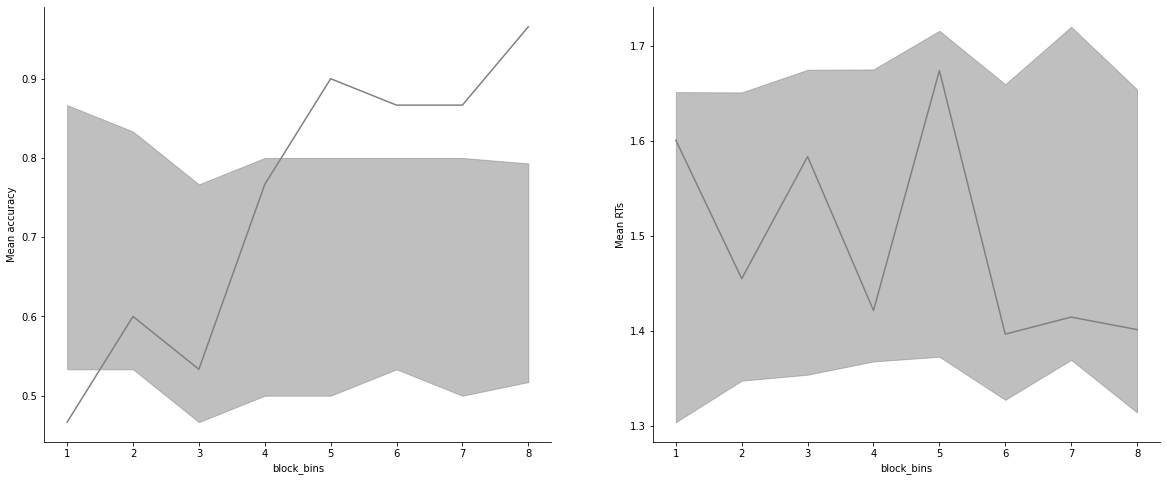

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/fits_race.py:199: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=70
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


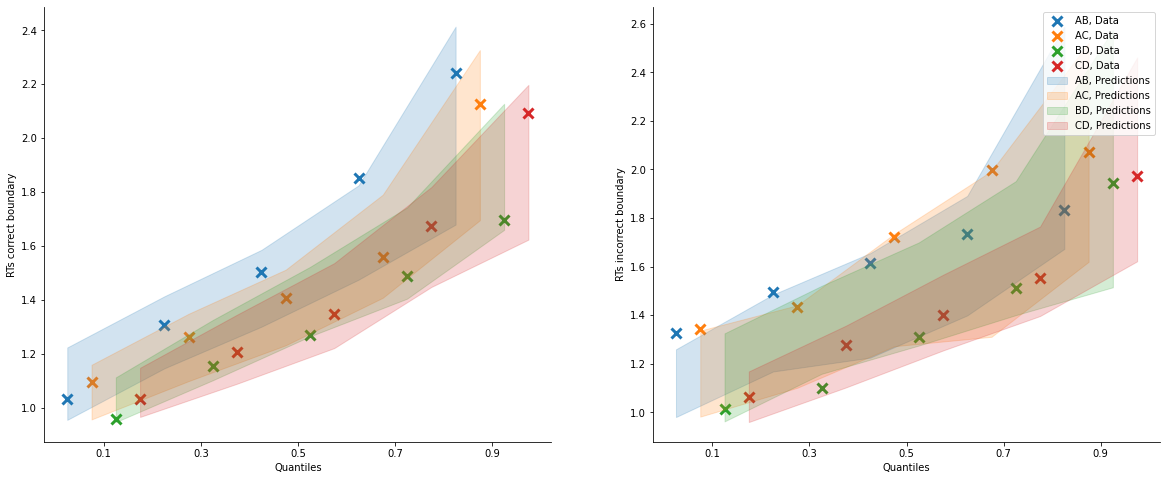

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
# sv = model_fit.last_values
# sv